# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 04: Numpy: basic vector arithmetic, linear algebra, and broadcasting.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### 0. What do we want to do today?

Our goal in Session 04 is to learn the basics of **Numpy**, a powerful number-crunching machinery that turn Python into a **vector programming language** - a kind of language ideally suited for mathematical statistics and Data Science.  

Along the way we will begin to understand how Numpy runs under Pandas and what is the relationship between them. And the basics of vector arithmetic in Numpy, of course. And how to vectorize a function with Numpy. And plenty of other things as well! 

### 1. Where am I?

In [16]:
import os
work_dir = os.getcwd()
print(work_dir)
print(os.listdir(work_dir))
data_dir = os.path.join(work_dir, "_data")
print(os.listdir(data_dir))

/home/ikacikac/workspace/dss03python2023/session04
['tasklist04_solutions.html', 'tasklist04_solutions.ipynb', 'dss03_py_session04.html', 'dss03_py_session04.ipynb', 'tasklist04.html', 'tasklist04.ipynb', '_data']
['numpy_array_2.csv', 'just_numbers.txt', 'numpy_array.csv', 'MovieRatings.csv']


### 2. Numpy, alright. A gentle introduction.

In [17]:
import numpy as np
# - set RGN sed
np.random.seed(777) 

**N.B.** The `np.random.seed(777)` thing will be explained in the session.

Lists seem like an ideal Python structure to hold numerical data. But there are things lists can and cannot do:

In [18]:
import math
l_1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
math.sqrt(l_1[-1])

10.0

What if we need to take the square rooth of **all** elements in `l_1`?

In [19]:
sqrt_l_1 = [math.sqrt(x) for x in l_1]
print(sqrt_l_1)

[3.1622776601683795, 4.47213595499958, 5.477225575051661, 6.324555320336759, 7.0710678118654755, 7.745966692414834, 8.366600265340756, 8.94427190999916, 9.486832980505138, 10.0]


That would do. But this:

In [20]:
math.sqrt(l_1)

TypeError: must be real number, not list

**does not work.** Now,

In [21]:
v_1 = np.array(l_1)
print(v_1)

[ 10  20  30  40  50  60  70  80  90 100]


In [22]:
type(v_1)

numpy.ndarray

In [23]:
np.sqrt(v_1)

array([ 3.16227766,  4.47213595,  5.47722558,  6.32455532,  7.07106781,
        7.74596669,  8.36660027,  8.94427191,  9.48683298, 10.        ])

More fun:

In [24]:
l_1 + 1

TypeError: can only concatenate list (not "int") to list

In [25]:
[x+1 for x in l_1]

[11, 21, 31, 41, 51, 61, 71, 81, 91, 101]

However, w. Numpy:

In [26]:
v_1 + 1

array([ 11,  21,  31,  41,  51,  61,  71,  81,  91, 101])

Operations, like `+`, `-`, `*`, `**` and similar - as well as Numpy, *vectorized* functions, are applied to all elements of a Numpy vector simultaneously - unlike in lists that we need to iterate in order to achieve the same effect.

In [27]:
v_1 ** 2

array([  100,   400,   900,  1600,  2500,  3600,  4900,  6400,  8100,
       10000])

#### Vectorizing functions w. Numpy

In [28]:
def plus_one(x):
    return(x+1)
plus_one(5)

6

In [29]:
plus_one(l_1[0])

11

In [30]:
plus_one(l_1)

TypeError: can only concatenate list (not "int") to list

Oh, no. No, no, no, look:

In [31]:
plus_one_v = np.vectorize(plus_one)
plus_one_v(l_1)

array([ 11,  21,  31,  41,  51,  61,  71,  81,  91, 101])

**N.B.** My call to `plus_one_v()`, i.e. `plus_one_v(l_1)` has automatically turned the `l_1` list into a Numpy vector before execution. Now `plus_one_v()` is a *vectorized* version of `plus_one()`.

Let's vectorize something else, w/o help from `np.vectorize()`. In Decision Theory, specifically in Choice under Risk, there is the concept of the Expected Utility of a set of risky options (called a *lottery* when put together), e.g.:

- **Option A**: Stay home, watch a movie. (costs \$5 to rent a movie via online services)
- **Option B**: Go to cinema, watch a movie. (costs \$10 to buy a ticket)



- **Option A1**: Stay home, play a board game. (costs \$10 to buy a board game)
- **Option B1:** Go to the board game club, play a board game. (costs \$3.5 to enter the club)

Let's assume that a decision maker has a Utility Function $u(x)$ for money that maps monetary value to utiliy, and that $u(x)$ takes a form of a power-utility function, i.e. $u(x) = x^{\rho}$ with some exponent $\rho$ controlling the function. 

<AxesSubplot: xlabel='money'>

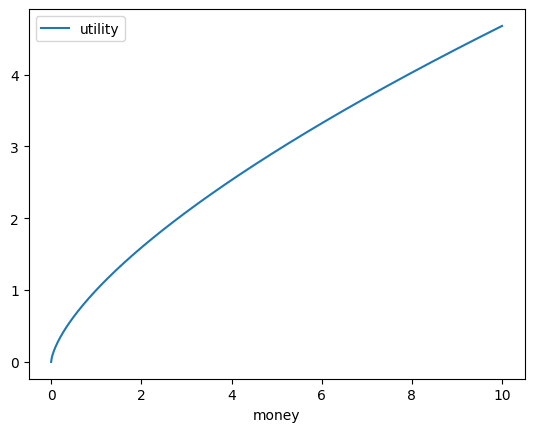

In [32]:
import pandas as pd
rho = .67
x = np.linspace(0, 10, 1000)
ux = x**rho
utility_data = pd.DataFrame({'money':x, 'utility':ux})
utility_data.plot.line(x='money',y='utility')

What is `np.linspace()`?

In [33]:
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

Now, let's assume that the probabilities of options `A`, `B`, `A1`, and `B1` are known to the decision maker, and that we have, of course, $P(A)+P(B)=1$ and $P(A1)+P(B1)=1$:

- **P(A) = .55**: Stay home, watch a movie. (costs \$5 to rent a movie via online services)
- **P(B) = .45**: Go to cinema, watch a movie. (costs \$10 to buy a ticket)


- **P(A1) = .75**: Stay home, play a board game. (costs \$10 to buy a board game)
- **P(B1) = .25**: Go to the board game club, play a board game. (costs \$3.5 to enter the club)

Now, with the utility function of exponent $\rho=.67$, the decision maker evaluates **the expected utility** of lotteries $(A, B)$ and $(A1, B1)$ in the following way:

In [34]:
# - power-utility function exponent:
rho = .67

# lottery (A,B)
pa = .55
pb = .45
ca = 5
cb = 10
eu_ab = pa*ca**rho + pb*cb**rho
print("EU(A,B) = " + str(eu_ab))

# lottery (A1,B1)
pa1 = .75
pb1 = .25
ca1 = 10
cb1 = 3.5
eu_a1b1 = pa1*ca1**rho + pb1*cb1**rho
print("EU(A1,B1) = " + str(eu_a1b1))

EU(A,B) = 3.7216687887050215
EU(A1,B1) = 4.086729704552689


And since monetary values constitue costs in this example, the decision maker - if cares only about the utility of money - should choose $(A,B)$ over $(A1,B1)$ according to the principle of Maximum Expected Utility.

A Python function to compute the expected utility of a lottery:

In [35]:
def eu(p1, p2, v1, v2, rho):
    leu = p1*v1**rho + p2*v2**rho
    return(leu)
    
# test eu()
eu(p1=.75, p2=.25, v1=10, v2=3.5, rho=.67)

4.086729704552689

Ok, now that works. However: what if we need to evaluate many lotteries at once?

In [36]:
pA = [.15, .33, .84]
vA = [10, 20, 30]
pB = [.85, .77, .16]
vB = [8, 17, 45]
lots = pd.DataFrame({'pA':pA,
                     'vA':vA,
                     'pB':pB,
                     'vB':vB})
lots

,pA,vA,pB,vB
0,0.15,10,0.85,8
1,0.33,20,0.77,17
2,0.84,30,0.16,45


Vectorized `eu()` via Numpy:

In [37]:
def eu_v(lotteries, rho):
    uA = np.power(lotteries['vA'], rho)
    uB = np.power(lotteries['vB'], rho)
    leu = pA*uA+pB*uB
    return leu

In [38]:
eu_v(lots,rho)

0     4.125252
1     7.595015
2    10.252668
dtype: float64

**Yes:** you can perform vectorized operations and use vectorized functions on `pd.DataFrame` columns.
**Remember:** a `pd.Series` object is, essentialy, a `np.array` with an index attached.

Check (first lottery only):

In [39]:
pA[0]*vA[0]**rho + pB[0]*vB[0]**rho

4.125251582123641

Check (second lottery only):

In [40]:
pA[1]*vA[1]**rho + pB[1]*vB[1]**rho

7.595014907577726

**N.B.** `np.vectorize` is not really recommended. As the Numpy documentation states:
> The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a for loop.
[numpy.vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html)

You should always write your own vectorized functions with Numpy.

### 3. Numpy, step by step.

In [41]:
a = [1, 2, 3]
b = [2, 2, 2]
# - a*b rises an error
# - TypeError: can't multiply sequence by non-int of type 'list'

# - Numpy
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
a*b

array([2, 4, 6])

#### Element-wise operations

In [42]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a+b

array([5, 7, 9])

In [43]:
a = np.array([10, 10, 10])
b = np.array([2, 3, 4])
a**b

array([  100,  1000, 10000])

In [44]:
a = np.repeat(10, repeats=3)
b = np.array([2, 3, 4])
a**b

array([  100,  1000, 10000])

In [45]:
np.repeat(10, repeats=3)

array([10, 10, 10])

In [46]:
a = np.repeat(10, repeats=3)
type(a.tolist())
print(a.tolist())

[10, 10, 10]


In [47]:
a = np.repeat(10, repeats=3)
list(a)

[10, 10, 10]

#### Matrices

In [48]:
mat = np.array([[1, 2, 3], 
                [4, 5, 6], 
                [7, 8, 9]])
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Shape

In [49]:
mat.shape

(3, 3)

#### Subsetting vectors, matrices, and multidimensional arrays

Subsetting Numpy arrays

In [50]:
print(mat)
mat[0, 0]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


1

In [51]:
print(mat)
mat[0, 1]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


2

Rows

In [52]:
print(mat)
mat[0, :]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1, 2, 3])

In [53]:
print(mat)
mat[1, :]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([4, 5, 6])

Columns

In [54]:
print(mat)
mat[:, 1]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([2, 5, 8])

In [55]:
print(mat)
mat[:, 2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([3, 6, 9])

Use a list to subset a NumPy array

In [56]:
v = np.linspace(1, 10, 10, dtype="int")
print(v)

[ 1  2  3  4  5  6  7  8  9 10]


In [57]:
v[[0, 2, 4]]

array([1, 3, 5])

Shape

In [58]:
a = np.array([1, 2, 3])
a.shape

(3,)

Dimension

In [59]:
a.ndim

1

In [60]:
mat.ndim

2

In [61]:
multiarray = np.array([
                        [[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
                        [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
                        [[19, 20, 21], [22, 23, 24], [25, 26, 27]]
                    ])
print(multiarray)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]


Dimension

In [62]:
multiarray.ndim

3

Easier:

In [63]:
multiarray = np.linspace(1,27, 27, dtype=int)
multiarray = np.reshape(multiarray, newshape=(3,3,3))
print(multiarray)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]


In [64]:
multiarray.shape

(3, 3, 3)

`np.linspace()`

In [65]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

`np.arrange()`

In [66]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [67]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Subsetting: work outside in

First layer od a 3D structure:

In [68]:
multiarray[0, :, :]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Second layer od a 3D structure:

In [69]:
multiarray[1, :, :]

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

Third layer od a 3D structure:

In [70]:
multiarray[2, :, :]

array([[19, 20, 21],
       [22, 23, 24],
       [25, 26, 27]])

Second rows from all layers

In [71]:
multiarray[:, 1, :]

array([[ 4,  5,  6],
       [13, 14, 15],
       [22, 23, 24]])

Second columns from all layers

In [72]:
multiarray[:, :, 1]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [73]:
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Pick a single element

In [74]:
mat[1, 1]

5

In [75]:
mat[1, -2]

5

Stepsize

In [76]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[0:10:2]

[1, 3, 5, 7, 9]

In [77]:
a[1:10:2]

[2, 4, 6, 8, 10]

Set the value of an element

In [78]:
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [79]:
mat[0, 1] = 17
print(mat)

[[ 1 17  3]
 [ 4  5  6]
 [ 7  8  9]]


Change whole row

In [80]:
mat[0, :] = [8, 9, 11]
print(mat)

[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


Stacking arrays

In [81]:
v1 = np.array([1, 1, 1, 1])
v2 = np.array([2, 2, 2, 2])
vstacked = np.vstack([v1, v2])
print(vstacked)

[[1 1 1 1]
 [2 2 2 2]]


In [82]:
v1 = np.array([1, 1, 1, 1])
v2 = np.array([2, 2, 2, 2])
hstacked = np.hstack([v1, v2])
print(hstacked)

[1 1 1 1 2 2 2 2]


### Some algebraic operations

Transpose

In [83]:
mat

array([[ 8,  9, 11],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [84]:
mat.T

array([[ 8,  4,  7],
       [ 9,  5,  8],
       [11,  6,  9]])

In [85]:
np.transpose(mat)

array([[ 8,  4,  7],
       [ 9,  5,  8],
       [11,  6,  9]])

Works on `pd.DataFrame` too:

In [86]:
print(lots)

     pA  vA    pB  vB
0  0.15  10  0.85   8
1  0.33  20  0.77  17
2  0.84  30  0.16  45


In [87]:
lots[['vA','vB']]

,vA,vB
0,10,8
1,20,17
2,30,45


In [88]:
lots[['vA','vB']].T

,0,1,2
vA,10,20,30
vB,8,17,45


Multiply matrix by a scalar constant, elementwise

In [89]:
c = 3
print(mat)
c * mat

[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


array([[24, 27, 33],
       [12, 15, 18],
       [21, 24, 27]])

Matrix times matrix, **elementwise**

In [90]:
mat1 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print(mat1)
print(mat)
print("Element-wise product is:")
mat1 * mat

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]
Element-wise product is:


array([[ 8,  9, 11],
       [ 8, 10, 12],
       [21, 24, 27]])

the same as:

In [91]:
np.multiply(mat1, mat)

array([[ 8,  9, 11],
       [ 8, 10, 12],
       [21, 24, 27]])

Vector by vector, **elementwise**:

In [92]:
x = mat[0, :]
y = mat[1, :]
x*y

array([32, 45, 66])

In [93]:
np.multiply(x, y)

array([32, 45, 66])

Algebraic operations: **the dot product**

In [94]:
v1 = np.array([1, 2, 3])
v2 = np.array([5, 6, 7])
print(v1)
print(v2)

[1 2 3]
[5 6 7]


In [95]:
np.dot(v2, v1)

38

Also, w. `@`:

In [96]:
v1 @ v2

38

In [97]:
v2 @ v1

38

Do not forget that this product **is not commutative for matrices**:

In [98]:
print(mat1)
print(mat)
print("Dot product: np.dot(mat1, mat)")
np.dot(mat1, mat)

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]
Dot product: np.dot(mat1, mat)


array([[19, 22, 26],
       [38, 44, 52],
       [57, 66, 78]])

In [99]:
print("Dot product: np.dot(mat, mat1)")
np.dot(mat, mat1)

Dot product: np.dot(mat, mat1)


array([[59, 59, 59],
       [32, 32, 32],
       [50, 50, 50]])

![](../img/fig3_numpy01.jpeg)

Using `@` is preferred (as it is faster):

In [100]:
mat @ mat1

array([[59, 59, 59],
       [32, 32, 32],
       [50, 50, 50]])

In [101]:
mat1 @ mat

array([[19, 22, 26],
       [38, 44, 52],
       [57, 66, 78]])

Dot product: vector times matrix

In [102]:
a = np.array([1, 2, 3])
print(a)
print(mat)

[1 2 3]
[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


In [103]:
np.dot(a, mat)

array([37, 43, 50])

In [104]:
print(a)
print(mat)
np.dot(mat, a)

[1 2 3]
[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


array([59, 32, 50])

In [105]:
print(a)
print(mat)
np.dot(a, mat.T)

[1 2 3]
[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


array([59, 32, 50])

In [106]:
print(a)
print(mat)
np.dot(mat.T, a)

[1 2 3]
[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


array([37, 43, 50])

In [107]:
np.dot(mat, a)

array([59, 32, 50])

![](../img/fig4_numpy02.jpeg)

Type

In [108]:
a.dtype

dtype('int64')

Size (the total number of elements)

In [109]:
a.size

3

Float array

In [110]:
a = np.array([[1.1, 2, 3.14], [2, 2.22, 1.41]])
a.dtype

dtype('float64')

Outer product of vectors

In [111]:
print(v1)
print(v2)
np.outer(v1, v2)

[1 2 3]
[5 6 7]


array([[ 5,  6,  7],
       [10, 12, 14],
       [15, 18, 21]])

In [112]:
np.outer(v2, v1)

array([[ 5, 10, 15],
       [ 6, 12, 18],
       [ 7, 14, 21]])

In [113]:
v2 = np.array([4, 5, 6, 7])
print(v1)
print(v2)
np.outer(v1, v2)

[1 2 3]
[4 5 6 7]


array([[ 4,  5,  6,  7],
       [ 8, 10, 12, 14],
       [12, 15, 18, 21]])

In [114]:
print(mat)
print(mat1)
np.outer(mat, mat1)

[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


array([[ 8,  8,  8, 16, 16, 16, 24, 24, 24],
       [ 9,  9,  9, 18, 18, 18, 27, 27, 27],
       [11, 11, 11, 22, 22, 22, 33, 33, 33],
       [ 4,  4,  4,  8,  8,  8, 12, 12, 12],
       [ 5,  5,  5, 10, 10, 10, 15, 15, 15],
       [ 6,  6,  6, 12, 12, 12, 18, 18, 18],
       [ 7,  7,  7, 14, 14, 14, 21, 21, 21],
       [ 8,  8,  8, 16, 16, 16, 24, 24, 24],
       [ 9,  9,  9, 18, 18, 18, 27, 27, 27]])

In [115]:
np.outer(mat1, mat)

array([[ 8,  9, 11,  4,  5,  6,  7,  8,  9],
       [ 8,  9, 11,  4,  5,  6,  7,  8,  9],
       [ 8,  9, 11,  4,  5,  6,  7,  8,  9],
       [16, 18, 22,  8, 10, 12, 14, 16, 18],
       [16, 18, 22,  8, 10, 12, 14, 16, 18],
       [16, 18, 22,  8, 10, 12, 14, 16, 18],
       [24, 27, 33, 12, 15, 18, 21, 24, 27],
       [24, 27, 33, 12, 15, 18, 21, 24, 27],
       [24, 27, 33, 12, 15, 18, 21, 24, 27]])

![](../img/fig5_numpy03.jpeg)

### Broadcasting

From the Numpy [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html#) documentation:

> The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

In [116]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3], [4, 5, 6]])
a+b

array([[2, 4, 6],
       [5, 7, 9]])

In [117]:
a*b

array([[ 1,  4,  9],
       [ 4, 10, 18]])

Example from NumPy [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) documentation: *A Practical Example: Vector Quantization*

In [118]:
# - one data point
observation = np.array([111.0, 188.0])
# - several data points
codes = np.array([[102.0, 203.0],
    [132.0, 193.0],
    [45.0, 155.0],
    [57.0, 173.0]])
# - the minimal distance between codes and observation:
diff = codes - observation
print(diff)
# - Euclidean distances
dist = np.sqrt(np.sum(diff**2,axis=1))
print(dist)
# - indice of the minimum
w_min = np.argmin(dist)
print(w_min)
# - minimal distance
print(dist[w_min])

[[ -9.  15.]
 [ 21.   5.]
 [-66. -33.]
 [-54. -15.]]
[17.49285568 21.58703314 73.79024326 56.04462508]
0
17.4928556845359


### More repeating of things

In [119]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [120]:
np.ones(10, dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [121]:
np.ones((2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [122]:
np.zeros(4)

array([0., 0., 0., 0.])

In [123]:
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [124]:
np.full((2,2), 10)

array([[10, 10],
       [10, 10]])

In [125]:
np.random.random(3)

array([0.15266373, 0.30235661, 0.06203641])

In [126]:
np.random.random((3, 3))

array([[0.45986034, 0.83525338, 0.92699705],
       [0.72698898, 0.76849622, 0.26920507],
       [0.64402929, 0.09337326, 0.07968589]])

In [127]:
np.random.randint(-3, 4, size=(3, 3))

array([[ 2, -2,  0],
       [-1, -1, -1],
       [ 3,  2,  1]])

In [128]:
v = np.array([1, 3, 5])
print(v)
np.repeat(v, repeats=3)

[1 3 5]


array([1, 1, 1, 3, 3, 3, 5, 5, 5])

In [129]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)

[[1 2 3]
 [4 5 6]]


In [130]:
np.repeat(a, repeats=2, axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [4, 5, 6]])

In [131]:
np.repeat(a, repeats=2, axis=1)

array([[1, 1, 2, 2, 3, 3],
       [4, 4, 5, 5, 6, 6]])

In [132]:
a = np.array([[1, 2, 3]])
print(a.ndim)
np.repeat(a, repeats=2, axis=0)

2


array([[1, 2, 3],
       [1, 2, 3]])

In [133]:
a = np.array([[1, 2, 3]])
print(a.ndim)
np.repeat(a, repeats=2, axis=1)

2


array([[1, 1, 2, 2, 3, 3]])

### Find elements based on conditions

In [134]:
v1 = np.linspace(1, 100, 100)
print(v1)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [135]:
cond = v1 > 50
print(cond)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [136]:
v1[cond]

array([ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100.])

In [137]:
v1[v1 < 50]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [138]:
v1[(v1 < 50) & (v1 > 10)]

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [139]:
print(mat)

[[ 8  9 11]
 [ 4  5  6]
 [ 7  8  9]]


In [140]:
mat[mat > 5]

array([ 8,  9, 11,  6,  7,  8,  9])

`np.any()`

In [141]:
my_matrix = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8 , 9]
    ])
print(my_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [142]:
np.any(my_matrix>7)

True

`np.any()` on columns:

In [143]:
np.any(my_matrix>7, axis=0)

array([False,  True,  True])

`np.any()` on rows:

In [144]:
np.any(my_matrix>7, axis=1)

array([False, False,  True])

Confused about axes? (e.g. `axis=0` for columns, `axis=1` for rows)

> Axes are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1).

`np.all()`

In [145]:
np.all(my_matrix > 7)

False

In [146]:
np.all(my_matrix > 0)

True

### The treatment of missing values in NumPy

In [147]:
v = np.array([1, 2, 3, 4, np.nan, 6, 7, np.nan, 8, 9])
print(v)

[ 1.  2.  3.  4. nan  6.  7. nan  8.  9.]


In [148]:
v.mean()

nan

In [149]:
s = np.sum(v[np.logical_not(np.isnan(v))])
print(s)
n = v[np.logical_not(np.isnan(v))].size
print(n)
s/n

40.0
8


5.0

In [150]:
print(np.isnan(v))
print(np.logical_not(np.isnan(v)))

[False False False False  True False False  True False False]
[ True  True  True  True False  True  True False  True  True]


Also you can do:

In [151]:
v = np.array([1, 2, 3, 4, np.nan, 6, 7, np.nan, 8, 9]) 
v1 = v[~np.isnan(v)]
v1.mean()

5.0

In [152]:
v[~np.isnan(v)].mean()

5.0

But you should definitelly use `numpy.nanmean()`:

In [153]:
np.nanmean(v)

5.0

#### Type conversion in Numpy

`astype()`

In [154]:
my_array = np.array([13.0, 12.0, 19.0])
print(my_array)
print(my_array.dtype)

[13. 12. 19.]
float64


In [155]:
my_array.astype("int32")

array([13, 12, 19], dtype=int32)

### 4. Apply a Linear Regression Model w. known coefficients in Numpy

A group of ten students took tests A, B, and C. We are now interested in their performance on some test D taken in the end of their first year in college.

To our best knowledge, and knowing what major programs they have enrolled, we judge the test A result to be the most important indicator of their future performance, test B to be a little less relevant, and test C a poor indicator.

We hypothesize that 

- if we put some multiplicative weights on test results say, i.e.
- we weight test A (weight: $\beta_1$), test B (weight: $\beta_2$), and test C (weight: $\beta_3$)
- and add some constant, say $\beta_0$ to, $\beta_1A + \beta_2B + \beta_3C$ (let's represent the constant by $\beta_0$)
- we could predict their 1st year performance in college by

$$D = \beta_0 + \beta_1A + \beta_2B + \beta_3C$$

Following a convention, we could say that we have a linear regression model of the following form 

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3$$

where $Y$ represents their 1st year performance on test D, while $X_1$, $X_2$, and $X_3$ stand for our A, B, and C test scores. We call $X_1$, $X_2$, and $X_3$ **the predictors**.

Let's assume that we already know the optimal values for $\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$, and that these values are:

- $\beta_0=7.96$,
- $\beta_1=5.71$,
- $\beta_2=2.23$, and
- $\beta_3=.65$.

We will also say that $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are our **regression coefficients**

Given the following data, how could we make Numpy compute $Y$ - the model predictions - for us?

Here's the design (a.k.a. regressor) matrix:

In [156]:
test_scores = pd.DataFrame({'A':[10, 7, 6, 2, 8, 8, 9, 5, 10, 7],
                            'B':[6, 3, 3, 7, 7, 1, 4, 2, 10, 9],
                            'C':[4, 5, 8, 7, 8, 9, 10, 2, 9, 10]})
test_scores

,A,B,C
0,10,6,4
1,7,3,5
2,6,3,8
3,2,7,7
4,8,7,8
5,8,1,9
6,9,4,10
7,5,2,2
8,10,10,9
9,7,9,10


In [157]:
test_scores.shape

(10, 3)

Let's now define a vector of coefficients, $\beta$:

In [158]:
betas = np.array([7.96, 5.71, 2.23, .65])
betas

array([7.96, 5.71, 2.23, 0.65])

In [159]:
def linear_predict(design_matrix, coeffs):
    # - add a column of ones for the intercept term
    features_with_intercept = np.hstack((np.ones((design_matrix.shape[0], 1)), design_matrix))
    # - compute the predictions
    predictions = np.dot(features_with_intercept, coeffs)    
    return(predictions)

# - test
predictions = linear_predict(test_scores, betas)
print(predictions.shape)
print(predictions)

(10,)
[81.04 57.87 54.11 39.54 74.45 61.72 74.77 42.27 93.21 74.5 ]


Let's analyse this ^^ step by step.

Add a column of 1s for $\beta_0$ (the intercept):

In [160]:
np.ones((test_scores.shape[0], 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

Augmented design matrix:

In [161]:
aug_features = np.hstack((np.ones((test_scores.shape[0], 1)), test_scores))
print(aug_features)

[[ 1. 10.  6.  4.]
 [ 1.  7.  3.  5.]
 [ 1.  6.  3.  8.]
 [ 1.  2.  7.  7.]
 [ 1.  8.  7.  8.]
 [ 1.  8.  1.  9.]
 [ 1.  9.  4. 10.]
 [ 1.  5.  2.  2.]
 [ 1. 10. 10.  9.]
 [ 1.  7.  9. 10.]]


The regression coefficients:

In [162]:
betas

array([7.96, 5.71, 2.23, 0.65])

Predict test score D:

In [163]:
np.dot(aug_features, betas)  

array([81.04, 57.87, 54.11, 39.54, 74.45, 61.72, 74.77, 42.27, 93.21,
       74.5 ])

Prediction of D for the first student (first row in `test_scores`):

In [164]:
7.96 + 5.71*10 + 2.23*6 + .65*4

81.03999999999999

### 5. Numpy and Pandas

In [165]:
data_set = pd.read_csv(os.path.join(data_dir, "MovieRatings.csv"),
                       index_col=0)
data_set.head()

,FILM,RottenTomatoes,Metacritic,IMDB,Fandango_Stars
0,Avengers: Age of Ultron (2015),74,66,7.8,5.0
1,Cinderella (2015),85,67,7.1,5.0
2,Ant-Man (2015),80,64,7.8,5.0
3,Do You Believe? (2015),18,22,5.4,5.0
4,Hot Tub Time Machine 2 (2015),14,29,5.1,3.5


In [166]:
rt = data_set.iloc[:, 1]
rt[0:10]

0    74
1    85
2    80
3    18
4    14
5    63
6    42
7    86
8    99
9    89
Name: RottenTomatoes, dtype: int64

In [167]:
rt.mean()

60.84931506849315

In [168]:
rt.median()

63.5

In [169]:
rt.var()

910.1564478034954

In [170]:
rt.std()

30.168799243647324

In [171]:
rt + 1

0       75
1       86
2       81
3       19
4       15
      ... 
141     88
142     98
143     98
144    101
145     88
Name: RottenTomatoes, Length: 146, dtype: int64

You can do that in the DataFrame directly:

In [172]:
print(data_set.head(5))
data_set['RottenTomatoes'] = data_set['RottenTomatoes'] + 1
print(data_set.head(5))

                             FILM  RottenTomatoes  Metacritic  IMDB  \
0  Avengers: Age of Ultron (2015)              74          66   7.8   
1               Cinderella (2015)              85          67   7.1   
2                  Ant-Man (2015)              80          64   7.8   
3          Do You Believe? (2015)              18          22   5.4   
4   Hot Tub Time Machine 2 (2015)              14          29   5.1   

   Fandango_Stars  
0             5.0  
1             5.0  
2             5.0  
3             5.0  
4             3.5  
                             FILM  RottenTomatoes  Metacritic  IMDB  \
0  Avengers: Age of Ultron (2015)              75          66   7.8   
1               Cinderella (2015)              86          67   7.1   
2                  Ant-Man (2015)              81          64   7.8   
3          Do You Believe? (2015)              19          22   5.4   
4   Hot Tub Time Machine 2 (2015)              15          29   5.1   

   Fandango_Stars  
0     

In [173]:
type(rt)

pandas.core.series.Series

Essentially, you can think of Pandas Series are Numpy arrays with indexes!

**N.B.** Excellent read: [Introduction to Pandas and NumPy from Codecademy](https://www.codecademy.com/article/introduction-to-numpy-and-pandas)

### Readings and Videos
- [Bill Lubanovic, Introducing Python, 1st Edition](https://www.oreilly.com/library/view/introducing-python-2nd/9781492051374/), Chapter 4.
- [freeCodeCamp.org: Python NumPy Tutorial for Beginners](https://www.youtube.com/watch?v=QUT1VHiLmmI)
- [Rob Mulla: A Gentle Introduction to Pandas Data Analysis (on Kaggle)](https://www.youtube.com/watch?v=_Eb0utIRdkw)

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>